In [10]:
import pandas as pd
#reading the csv file and replacing all the 0 and '[]' with Nan
data = pd.read_csv("tmdb_5000_movies.csv", na_values=[0,'[]'])
len(data.columns)
data.shape

(4803, 20)

In [11]:
#dropping columns which are not useful for analysis
data.drop(['homepage','id','keywords','original_title','overview','tagline'], axis = 1, inplace=True)
data.shape

(4803, 14)

In [12]:
#dropping rows with more than 3 null values
data = data.dropna(thresh=11)
data.shape

(4633, 14)

In [13]:
#dropping rows with no production companies 
data = data.dropna(subset=['production_companies'])
data = data.dropna(subset=['runtime']) #deleting the movies with no runtime!
data = data.dropna(subset=['runtime']) #deleting the movies with no runtime
data = data.dropna(subset=['production_countries'])#deleting the movies with no production_countries
data = data.dropna(subset=['spoken_languages'])#deleting the movies with no spoken languages
data['revenue']=data['revenue'].fillna(0)
data.shape
data.isnull().sum()

budget                  735
genres                    0
original_language         0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
title                     0
vote_average              6
vote_count                6
dtype: int64

In [14]:
#creating a dataframe which stores the average budget of all the poduction companies

import pandas as pd
import json
import math
d = {}

def company_average(budget, companies):
    global d
    if math.isnan(budget):
        return
    
    data = json.loads(companies)
    per_company = budget/len(companies)
    
    for company in data:
        name = company['name']
        if name in d.keys():
            d[name]['total'] +=per_company
            d[name]['number'] +=1
            d[name]['total'] =d[name]['total']/d[name]['number']
        else:
            d[name]={'total':per_company, 'average': per_company, 'number':1}
    
for i in (data.index):
    company_average(data.loc[i,'budget'],data.loc[i,'production_companies'])
    
companies = pd.DataFrame(d).transpose()
companies

,average,number,total
Ingenious Film Partners,1.167488e+06,27.0,9.676298e+02
Twentieth Century Fox Film Corporation,1.167488e+06,209.0,5.642211e+02
Dune Entertainment,1.167488e+06,56.0,1.349541e+03
Lightstorm Entertainment,1.167488e+06,5.0,1.715555e+05
Walt Disney Pictures,2.127660e+06,104.0,3.592661e+02
Jerry Bruckheimer Films,2.127660e+06,20.0,9.799397e+03
Second Mate Productions,2.127660e+06,2.0,1.773050e+06
Columbia Pictures,2.378641e+06,182.0,3.056718e+01
Danjaq,2.378641e+06,8.0,2.928493e+03
B24,2.378641e+06,1.0,2.378641e+06


In [15]:
#using the companies dataframe to fill the rows with null budget with the sum of the averages of the companies' budget

import json

#number of null budget values before filling with average = 754
print(data[data['budget'].isna()].shape)

def get_average(data):
    
    comp = json.loads(data)
    budget = 0
    for i in comp:
        if i['name'] in companies.index:
            budget += companies.loc[i['name'],'average']
    return budget


for i in data[data['budget'].isna()].index:
    average = get_average(data.loc[i,'production_companies'])
    data.loc[i,'budget']= average

#number of null budget values after filling with average = 477    
data[data['budget'].isna()].shape

(735, 14)


(0, 14)

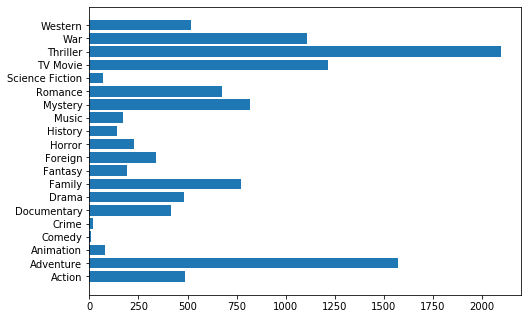

In [19]:
#bar graph
d1 = {}
arr=[]
def genrestotal(genre):
    global d1
    data = json.loads(genre)
    #per_company = budget/len(genre)
    for i in data:
        name = i['name']
        #if name in d.keys():
        arr.append(name)
for i in (data.index):
    genrestotal(data.loc[i,'genres'])
d1=set(arr)
arr
countarr=[]
counter=0;
for j in d1:
    for i in arr:
        if j==i:
            counter=counter+1;
    countarr.append(counter);
    counter=0;
countarr.reverse()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genress = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','Horror','History','Music','Mystery','Romance','Science Fiction', 'TV Movie','Thriller','War','Western']
ax.barh(genress,countarr)
plt.show()

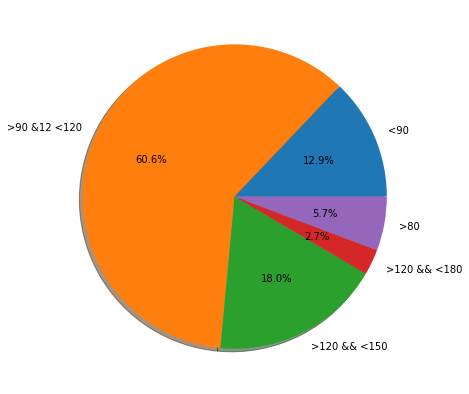

In [20]:
#pie graph
#freq,bins,patches=plt.hist(data['runtime']) histogram ( an alternative )
import matplotlib.pyplot as plt
import seaborn as sns
count1=0
count2=0
count3=0
count4=0
count5=0
for i in data['runtime']:
    if i<90:
        count1=count1+1;
    elif i>90 and i<120:
        count2=count2+1;
    elif i>120 and i<150:
        count3=count3+1;
    elif i>150 and i<180:
        count4=count4+1;
    else :
        count5=count5+1;
runtimes = ['<90', '>90 &12 <120','>120 && <150', 
        '>120 && <180', '>80'] 
  
rtdata= [count1,count2,count3,count4,count5] 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(rtdata, labels = runtimes, autopct='%1.1f%%', shadow=True) 
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2059d7de358>,
 'caps': [<matplotlib.lines.Line2D at 0x2059d7dea20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2059d7cef60>],
 'medians': [<matplotlib.lines.Line2D at 0x2059d7dee48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2059d7e8438>],
 'means': []}

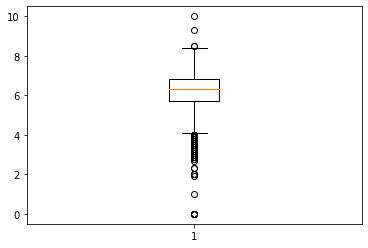

In [21]:
#box plot
data['vote_average']=data['vote_average'].fillna(0) #replace the 6 NaN values of voteaverage with 0 
data['vote_count']=data['vote_count'].fillna(0)
plt.boxplot(data['vote_average'])

In [73]:
#normalization

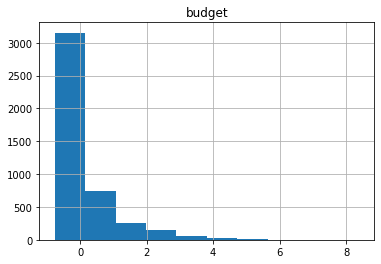

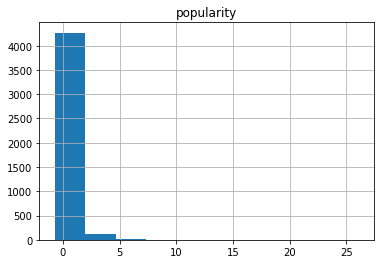

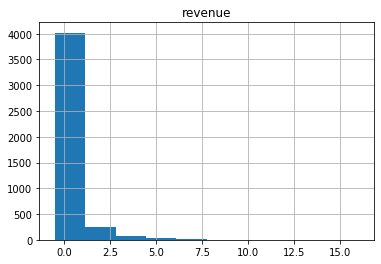

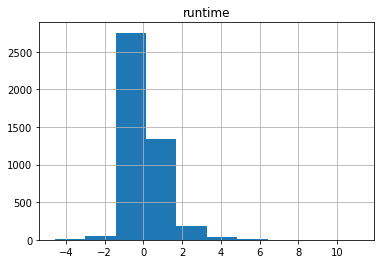

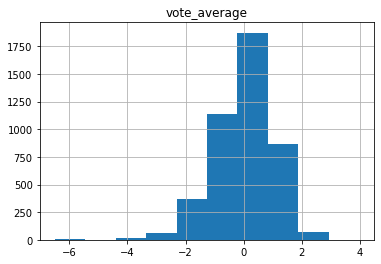

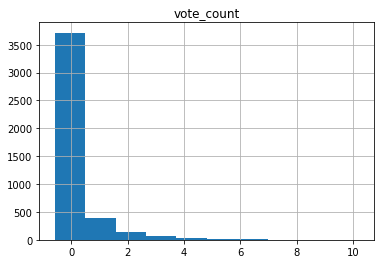

In [22]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

def z_score(df):
    df_std = data.copy()
    for column in columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

df_standardised = z_score(data)
for column in columns:
    df_standardised[column].hist()
    plt.title(column)
    plt.show()

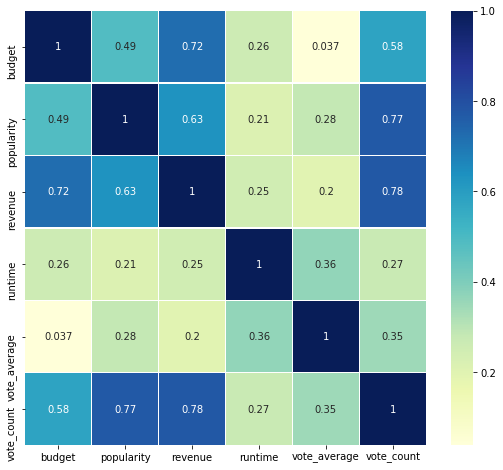

In [23]:
#correlation
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True)

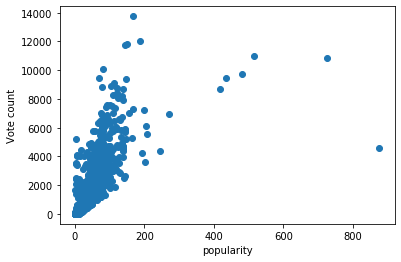

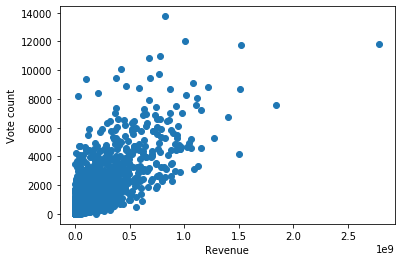

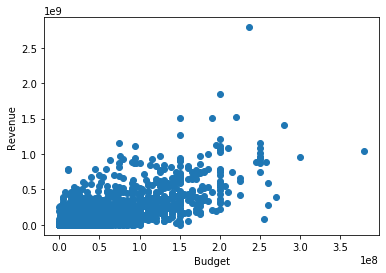

In [24]:
plt.scatter(data['popularity'],data['vote_count']) #vote count increases with the popularity
plt.xlabel('popularity')
plt.ylabel('Vote count')
plt.show()
plt.scatter(data['revenue'],data['vote_count']) #revenue increases with increase in vote_count 
plt.xlabel('Revenue')
plt.ylabel('Vote count')
plt.show()
plt.scatter(data['budget'],data['revenue'])#revenue increases with the budget 
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()